# Predicting the “Customer Life Time Value”



### Problem Description : To predict the Customer life time value for an auto insurance company based on different quantitative and qualitative features provided.



### Primary Evaluation Metric : RMSE

##### Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

##### Train data

In [2]:
## reading the train data
data_train= pd.read_csv('./train-1574429526318.csv')

In [3]:
pp.ProfileReport(data_train.drop("Customer.Lifetime.Value",axis=1))

In [4]:
#pip install autoviz

In [5]:
from autoviz.AutoViz_Class import AutoViz_Class
AV= AutoViz_Class()

Imported AutoViz_Class version: 0.0.67. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


Shape of your Data Set: (9806, 22)
Classifying variables in data set...
    21 Predictors classified...
        This does not include the Target column(s)
    3 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Could not draw Distribution Plots
Number of Cat and Continuous Vars exceeds 30, hence no Pivot Tables
Time to run AutoViz (in seconds) = 1.503


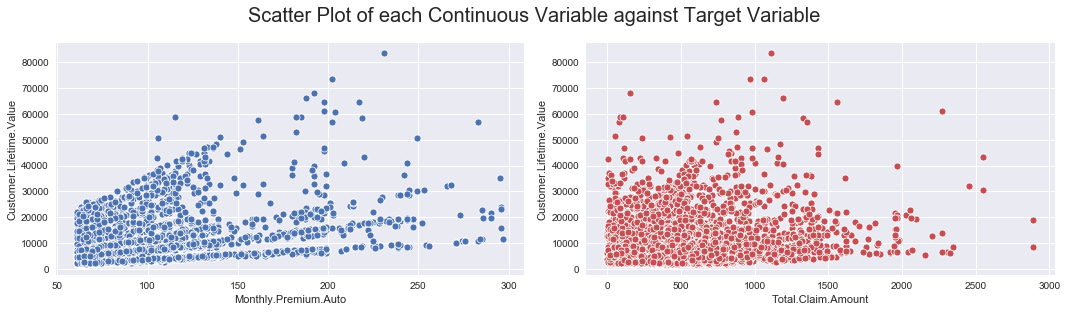

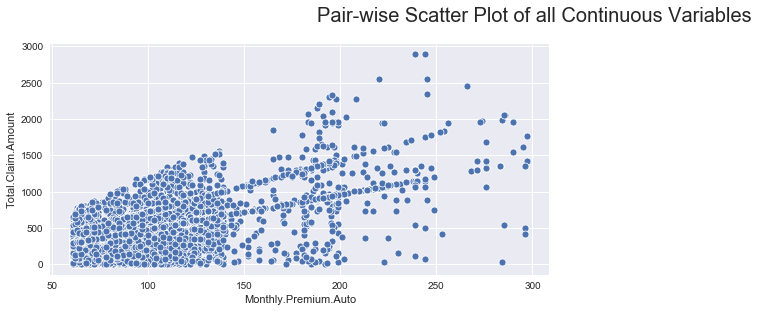

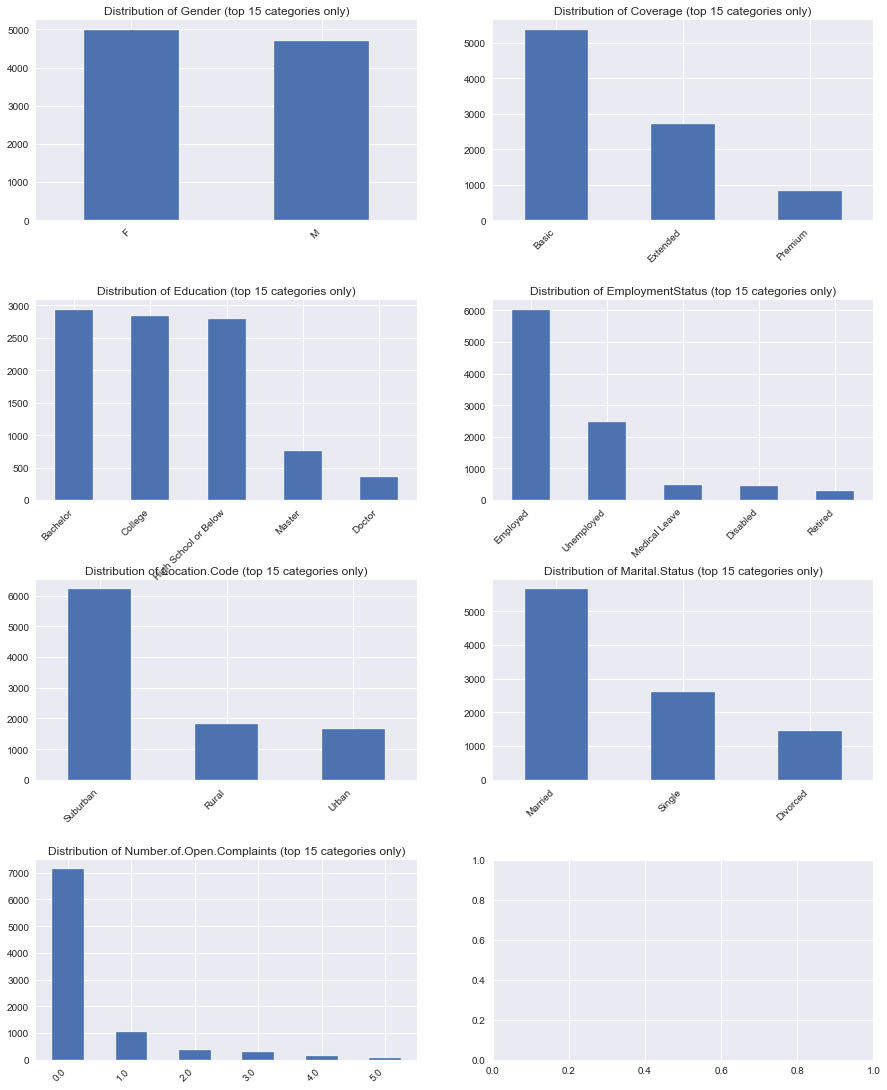

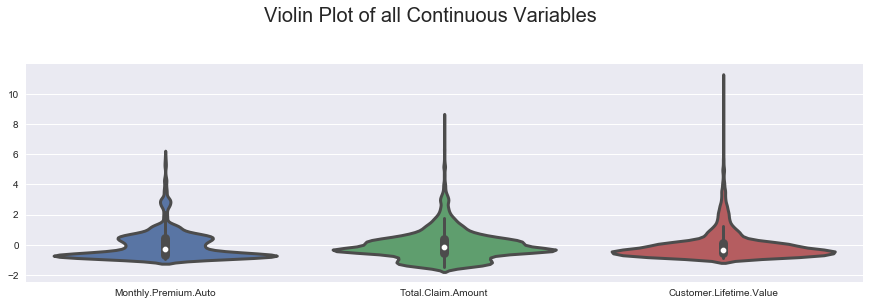

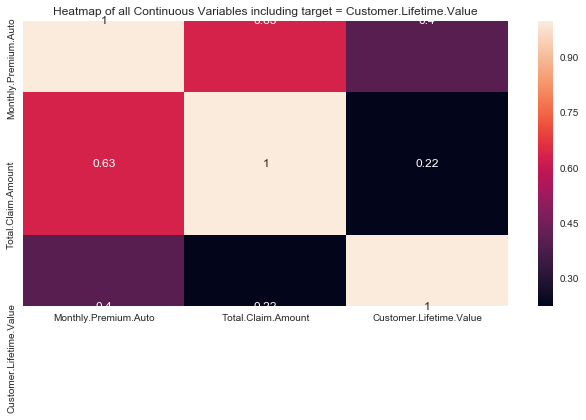

In [6]:
vis= AV.AutoViz(filename='',sep=",",depVar='Customer.Lifetime.Value',dfte=data_train)

In [7]:
## creating a copy of the file
data_train1= data_train.copy()

In [8]:
## get and set option is to display all the rows and columns 
pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)
pd.get_option('display.max_columns')
pd.set_option('display.max_columns', None)
data_train.head(5)

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,67.0,2,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,116.0,2,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


In [9]:
## this is to set the index from count 1
data_train.index = np.arange(1, len(data_train) + 1)

In [10]:
## in this function we can see the datatype,number of levels present,what are the levels, count and percentage of Nan
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x:str(x.unique()),axis=0), "NaN":round(data.isnull().sum(),1),"NaN%":round(data.isnull().sum()/100,1)})
inspect_data(data_train)

,Data Type,No of Levels,Levels,NaN,NaN%
CustomerID,int64,9806,[5917 2057 4119 ... 8767 9900 11323],0,0.0
Customer.Lifetime.Value,float64,6477,[7824.372789 8005.964669 8646.504109 ... 20496...,0,0.0
Coverage,object,3,['Basic' 'Extended' nan 'Premium'],925,9.2
Education,object,5,['Bachelor' 'College' 'High School or Below' '...,129,1.3
EmploymentStatus,object,5,['Unemployed' 'Employed' 'Retired' 'Medical Le...,118,1.2
Gender,object,2,['F' 'M' nan],129,1.3
Income,object,4622,['0' '63357' '64125' ... '26173' '74665' '18017'],0,0.0
Location.Geo,object,2840,"['17.7,77.7' '28.8,76.6' '21.6,88.4' ... '22.3...",0,0.0
Location.Code,object,3,['Urban' 'Suburban' 'Rural' nan],119,1.2
Marital.Status,object,3,['Married' 'Divorced' 'Single' nan],129,1.3


In [11]:
## to check the summary statistics of the data
data_train.describe()

,CustomerID,Customer.Lifetime.Value,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
count,9806.000000,9806.000000,9012.000000,9806.000000,9806.000000,8988.000000,9685.000000,9806.000000,9680.000000
mean,5778.381807,7998.047015,93.340657,15.143993,48.165001,0.379172,2.960351,438.266734,2.089773
std,3343.286093,6848.055899,34.417763,10.004327,27.963630,0.896427,2.389801,293.502301,0.538524
min,1.000000,1898.007675,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2879.250000,4013.949039,68.750000,6.000000,24.000000,0.000000,1.000000,280.352767,2.000000
50%,5783.000000,5780.182197,83.000000,14.000000,48.000000,0.000000,2.000000,384.007015,2.000000
75%,8678.750000,8960.280213,109.000000,23.000000,71.750000,0.000000,4.000000,553.540973,2.000000
max,11573.000000,83325.381190,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,3.000000


In [12]:
## removing the attributes which are not important to the data
data_train=data_train.drop(['CustomerID','Location.Geo'],axis=1)


In [13]:
## to show the column names present in data
data_train.columns

Index(['Customer.Lifetime.Value', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location.Code', 'Marital.Status',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [14]:
## separating the categoric and numeric variables
cat_cols = ['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type','Policy','Renew.Offer.Type','Sales.Channel','Vehicle.Class','Vehicle.Size']
num_cols = data_train.columns.difference(cat_cols)
num_cols

Index(['Customer.Lifetime.Value', 'Income', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Number.of.Policies',
       'Total.Claim.Amount'],
      dtype='object')

In [15]:
## removing the ?
data_train.Income=data_train.Income.replace('?',np.nan)

In [16]:
## as per test data i have removed the retired level
data_train.EmploymentStatus=data_train.EmploymentStatus.replace('Retired',np.nan)

In [17]:
data_train['Vehicle.Size'].value_counts()

2.0    6795
3.0    1877
1.0    1008
Name: Vehicle.Size, dtype: int64

In [18]:
data_train[cat_cols] = data_train[cat_cols].apply(lambda x: x.astype('category'))
data_train[num_cols] = data_train[num_cols].apply(lambda x: x.astype('float'))
data_train.dtypes

Customer.Lifetime.Value           float64
Coverage                         category
Education                        category
EmploymentStatus                 category
Gender                           category
Income                            float64
Location.Code                    category
Marital.Status                   category
Monthly.Premium.Auto              float64
Months.Since.Last.Claim           float64
Months.Since.Policy.Inception     float64
Number.of.Open.Complaints         float64
Number.of.Policies                float64
Policy.Type                      category
Policy                           category
Renew.Offer.Type                 category
Sales.Channel                    category
Total.Claim.Amount                float64
Vehicle.Class                    category
Vehicle.Size                     category
dtype: object

In [19]:
data_train.shape

(9806, 20)

In [20]:
num_data = data_train.loc[:,num_cols]
cat_data = data_train.loc[:,cat_cols]

In [21]:
#Numeric columns imputation
imp = SimpleImputer(missing_values=np.nan, strategy='median')
num_data = pd.DataFrame(imp.fit_transform(num_data),columns=num_cols)

print(num_data.isnull().sum())

Customer.Lifetime.Value          0
Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
dtype: int64


In [22]:
# categoric columns imputation
imp_c = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_data = pd.DataFrame(imp_c.fit_transform(cat_data),columns=cat_cols)

print(cat_data.isnull().sum())

Coverage            0
Education           0
EmploymentStatus    0
Gender              0
Location.Code       0
Marital.Status      0
Policy.Type         0
Policy              0
Renew.Offer.Type    0
Sales.Channel       0
Vehicle.Class       0
Vehicle.Size        0
dtype: int64


In [23]:
cat_data = pd.get_dummies(cat_data,columns=['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type','Policy','Renew.Offer.Type','Sales.Channel','Vehicle.Class','Vehicle.Size'],drop_first=True)

In [24]:
data_train.shape

(9806, 20)

In [25]:
#standardizer = StandardScaler()
#standardizer.fit(num_data)
#num_data = pd.DataFrame(standardizer.transform(num_data),columns=num_cols)

data_train = pd.concat([num_data,cat_data],axis=1)

In [26]:
data_train.dtypes

Customer.Lifetime.Value           float64
Income                            float64
Monthly.Premium.Auto              float64
Months.Since.Last.Claim           float64
Months.Since.Policy.Inception     float64
Number.of.Open.Complaints         float64
Number.of.Policies                float64
Total.Claim.Amount                float64
Coverage_Extended                   uint8
Coverage_Premium                    uint8
Education_College                   uint8
Education_Doctor                    uint8
Education_High School or Below      uint8
Education_Master                    uint8
EmploymentStatus_Employed           uint8
EmploymentStatus_Medical Leave      uint8
EmploymentStatus_Unemployed         uint8
Gender_M                            uint8
Location.Code_Suburban              uint8
Location.Code_Urban                 uint8
Marital.Status_Married              uint8
Marital.Status_Single               uint8
Policy.Type_Personal Auto           uint8
Policy.Type_Special Auto          

In [27]:
x = data_train.drop("Customer.Lifetime.Value",axis=1)
y = data_train["Customer.Lifetime.Value"]

In [28]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3,random_state=1)

In [29]:
print(x_train.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_validation.shape)


(6864, 44)
(2942, 44)
(6864,)
(2942,)


## Model Implementation

In [31]:
## libraries for model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [32]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred_valid1 = regressor.predict(x_validation)
y_pred_train1= regressor.predict(x_train)

In [34]:
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train1))

print(rmse_train)

6186.569355222588


In [35]:

rmse_validation = sqrt(mean_squared_error(y_validation, y_pred_valid1))

print(rmse_validation)

6404.945871792148


In [36]:
from sklearn.svm import SVR

In [37]:
svr= SVR()
svr

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
svr.fit(x_train, y_train)
y_pred_valid3 = svr.predict(x_validation)
y_pred_train3= svr.predict(x_train)

In [39]:
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train3))

print(rmse_train)

7082.867450827963


In [40]:

rmse_validation = sqrt(mean_squared_error(y_validation, y_pred_valid3))

print(rmse_validation)

7489.6528644502105


In [41]:
decision= DecisionTreeRegressor(max_depth=5,ccp_alpha=0.5)
decision.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.5, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [42]:
y_pred_train5 = decision.predict(x_train)
y_pred_valid5 = decision.predict(x_validation)

In [43]:
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train5))

print(rmse_train)

3971.8488339038163


In [44]:
rmse_validation = sqrt(mean_squared_error(y_validation, y_pred_valid5))

print(rmse_validation)

4167.034697796387


#### Test data

In [45]:
data_test= pd.read_csv('./test-1574429501088.csv')

In [46]:
data_test1= data_test.copy()

In [47]:
data_test['Vehicle.Size'].value_counts()

Medsize    1252
Small       343
Large       172
Name: Vehicle.Size, dtype: int64

In [48]:
data_test['Vehicle.Size'] = data_test['Vehicle.Size'].map({'Medsize':2.0 , 'Small':3.0,'Large':1.0})

In [49]:
data_test.head(5)

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,2.0
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,2.0
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,9,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.029737,Four-Door Car,2.0
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,12,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920271,Four-Door Car,2.0
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,8,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200000,Four-Door Car,2.0


In [50]:
inspect_data(data_test)

,Data Type,No of Levels,Levels,NaN,NaN%
CustomerID,int64,1767,[17 19 29 ... 11559 11570 11572],0,0.0
Coverage,object,3,['Basic' 'Extended' 'Premium'],0,0.0
Education,object,5,['Bachelor' 'College' 'Master' 'High School or...,0,0.0
EmploymentStatus,object,4,['Employed' 'Disabled' 'Medical Leave' 'Unempl...,0,0.0
Gender,object,2,['M' 'F'],0,0.0
Income,float64,1219,[43836.0 28812.0 77026.0 ... 30205.0 36918.0 5...,239,2.4
Location.Geo,object,1192,"['12.6,79.4' '17.3,78.4' '18.4,73.5' ... '18.8...",0,0.0
Location.Code,object,3,['Rural' 'Urban' 'Suburban'],0,0.0
Marital.Status,object,3,['Single' 'Married' 'Divorced'],0,0.0
Monthly.Premium.Auto,float64,142,[73.0 93.0 110.0 64.0 79.0 71.0 72.0 111.0 237...,72,0.7


In [51]:
data_test.describe()

,CustomerID,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
count,1767.000000,1528.000000,1695.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,5834.826825,44606.390707,93.622419,15.022071,47.486701,0.413696,3.002264,423.389681,2.096774
std,3328.701974,29046.821652,34.752238,10.202317,27.954860,0.955579,2.388154,289.518186,0.531271
min,17.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,1.332349,1.000000
25%,2977.000000,23491.750000,69.000000,6.000000,24.000000,0.000000,1.000000,238.197494,2.000000
50%,5813.000000,42821.000000,84.000000,14.000000,47.000000,0.000000,2.000000,381.118731,2.000000
75%,8702.500000,67968.500000,110.000000,23.000000,71.000000,0.000000,4.000000,542.400000,2.000000
max,11572.000000,99960.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2759.794354,3.000000


In [52]:
data_test=data_test.drop(['CustomerID','Location.Geo'],axis=1)


In [53]:
cat_cols_test = ['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type','Policy','Renew.Offer.Type','Sales.Channel','Vehicle.Class','Vehicle.Size']
num_cols_test = data_test.columns.difference(cat_cols_test)
num_cols_test

Index(['Income', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount'],
      dtype='object')

In [54]:
data_test.Income=data_test.Income.replace('?',np.nan)

In [55]:
data_test[cat_cols_test] = data_test[cat_cols_test].apply(lambda x: x.astype('category'))
data_test[num_cols_test] = data_test[num_cols_test].apply(lambda x: x.astype('float'))
data_test.dtypes

Coverage                         category
Education                        category
EmploymentStatus                 category
Gender                           category
Income                            float64
Location.Code                    category
Marital.Status                   category
Monthly.Premium.Auto              float64
Months.Since.Last.Claim           float64
Months.Since.Policy.Inception     float64
Number.of.Open.Complaints         float64
Number.of.Policies                float64
Policy.Type                      category
Policy                           category
Renew.Offer.Type                 category
Sales.Channel                    category
Total.Claim.Amount                float64
Vehicle.Class                    category
Vehicle.Size                     category
dtype: object

In [56]:
num_data_test = data_test.loc[:,num_cols_test]
cat_data_test = data_test.loc[:,cat_cols_test]

In [57]:
imp_test = SimpleImputer(missing_values=np.nan, strategy='median')
num_data_test = pd.DataFrame(imp.fit_transform(num_data_test),columns=num_cols_test)


In [58]:
cat_data_test = pd.get_dummies(cat_data_test,columns=['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type','Policy','Renew.Offer.Type','Sales.Channel','Vehicle.Class','Vehicle.Size'],drop_first=True)

In [59]:
#standardizer_test = StandardScaler()
#standardizer_test.fit(num_data_test)
#num_data_test = pd.DataFrame(standardizer_test.transform(num_data_test),columns=num_cols_test)

data_test = pd.concat([num_data_test,cat_data_test],axis=1)

In [60]:
data_test.shape

(1767, 44)

In [61]:
data_train.shape

(9806, 45)

In [62]:
data_test.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Unemployed,Gender_M,Location.Code_Suburban,Location.Code_Urban,Marital.Status_Married,Marital.Status_Single,Policy.Type_Personal Auto,Policy.Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew.Offer.Type_Offer2,Renew.Offer.Type_Offer3,Renew.Offer.Type_Offer4,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car,Vehicle.Size_2.0,Vehicle.Size_3.0
0,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,28812.0,93.0,17.0,7.0,0.0,8.0,425.527834,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,77026.0,110.0,9.0,82.0,2.0,3.0,472.029737,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,24599.0,64.0,12.0,50.0,1.0,2.0,42.920271,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,13789.0,79.0,8.0,49.0,0.0,1.0,379.200000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [63]:
data_test.isnull().sum()

Income                            0
Monthly.Premium.Auto              0
Months.Since.Last.Claim           0
Months.Since.Policy.Inception     0
Number.of.Open.Complaints         0
Number.of.Policies                0
Total.Claim.Amount                0
Coverage_Extended                 0
Coverage_Premium                  0
Education_College                 0
Education_Doctor                  0
Education_High School or Below    0
Education_Master                  0
EmploymentStatus_Employed         0
EmploymentStatus_Medical Leave    0
EmploymentStatus_Unemployed       0
Gender_M                          0
Location.Code_Suburban            0
Location.Code_Urban               0
Marital.Status_Married            0
Marital.Status_Single             0
Policy.Type_Personal Auto         0
Policy.Type_Special Auto          0
Policy_Corporate L2               0
Policy_Corporate L3               0
Policy_Personal L1                0
Policy_Personal L2                0
Policy_Personal L3          

In [64]:
y_pred_test1 = regressor.predict(data_test)


In [65]:
y_pred_test1

array([ 6500.03346348,  8332.62812062,  8808.15833898, ...,
       15459.90087114,  6984.40497015,  7362.60300872])

In [66]:
data_test.shape

(1767, 44)

In [67]:
data_train.shape

(9806, 45)

In [68]:
predic1 = pd.read_csv('./sample_submission-1577482703002.csv')

In [69]:
predic1.columns

Index(['CustomerID', 'Customer.Lifetime.Value'], dtype='object')

In [70]:
predic1['Customer.Lifetime.Value']= y_pred_test1

In [71]:
predic1.head()

,CustomerID,Customer.Lifetime.Value
0,17,6500.033463
1,19,8332.628121
2,29,8808.158339
3,34,5191.007659
4,37,6428.373626


In [72]:
predic1.to_csv('final1.csv',index=False)

In [73]:
y_pred_test2 = svr.predict(data_test) 

In [74]:
y_pred_test2

array([5773.26273833, 5750.58549166, 5769.6602182 , ..., 5753.34572095,
       5764.26854914, 5780.64705729])

In [75]:
predic2 = pd.read_csv('./sample_submission-1577482703002.csv')

In [76]:
predic2['Customer.Lifetime.Value']= y_pred_test2

In [77]:
predic2.to_csv('final2.csv',index=False)

In [78]:
predic2.head()

,CustomerID,Customer.Lifetime.Value
0,17,5773.262738
1,19,5750.585492
2,29,5769.660218
3,34,5742.689475
4,37,5723.456216


In [79]:
y_pred_test3= decision.predict(data_test)

In [80]:
y_pred_test3

array([ 2739.88007202,  6741.20316059,  8268.18740241, ...,
       14770.14226787,  5233.22754777,  3551.41350518])

In [81]:
predic3 = pd.read_csv('./sample_submission-1577482703002.csv')

In [82]:
predic3['Customer.Lifetime.Value']= y_pred_test3

In [83]:
predic3.to_csv('final3.csv',index=False)